# Sample Euler Project Problems
The Euler project is a website that contains computational problems that are intended to be solved by computer programs. In this post I'll be examining a few problems I found interesting and detail my solutions. 

In [37]:
import math
import numpy as np
import random
import scipy.special as special
from scipy.stats import hypergeom
import seaborn as sns; sns.set()
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

# Fibonacci Sequence
What is the index of the first term in the Fibonacci sequence to contain 1000 digits?

In [38]:
#Create a python generator to yield the values of the Fibonacci sequence.
def fibonacci():
    n_1, n_2 = 0,1
    while True:
        yield (n_1 + n_2)
        n_1, n_2 = n_2, n_1 + n_2 #Update values of n-1 and n-2.

In [39]:
#Create fibonacci generator and start counting the indices. 
f = fibonacci()
index = 1

#Iterate over the generator to produce values until you get to a value with a length of 1000. 
for x in f:
    index += 1
    length = (int(math.log10(x))+1) #Check the length of the number. 
    if (length == 1000):
        print ('The first index of the Fibonacci sequence to break 1000 digits is {}. It has a length of {} digits.'.format(index, length))
        break
    

The first index of the Fibonacci sequence to break 1000 digits is 4782. It has a length of 1000 digits.


# Lycrel Numbers
If we take 47, reverse and add, 47 + 74 = 121, which is palindromic.

Not all numbers produce palindromes so quickly. For example,

349 + 943 = 1292

1292 + 2921 = 4213

4213 + 3124 = 7337

That is, 349 took three iterations to arrive at a palindrome.

Although no one has proved it yet, it is thought that some numbers, like 196, never produce a palindrome. A number that never forms a palindrome through the reverse and add process is called a Lychrel number. Due to the theoretical nature of these numbers, and for the purpose of this problem, we shall assume that a number is Lychrel until proven otherwise. In addition you are given that for every number below ten-thousand, it will either (i) become a palindrome in less than fifty iterations, or, (ii) no one, with all the computing power that exists, has managed so far to map it to a palindrome. In fact, 10677 is the first number to be shown to require over fifty iterations before producing a palindrome: 4668731596684224866951378664 (53 iterations, 28-digits).

Surprisingly, there are palindromic numbers that are themselves Lychrel numbers; the first example is 4994.

How many Lychrel numbers are there below ten-thousand?

In [40]:
#Define function to reverse a number.
def reverse(number):
    reversed = int(str(number)[::-1]) 
    return(reversed)

#Define function to sum a number and its reverse. 
def sum_reverse(number): 
    return(number + reverse(number))

#Define a function to check if a number is a palindrome. 
def is_palindrome(number):
    if (reverse(number) == number):
        return True
    else:
        return False
    
#Define a function to check if a number is a lychrel value.
def is_lychrel(number):
    new_num = number
    bool_lychrel = True
    for i in range (50):
        new_num = sum_reverse(new_num)
        if is_palindrome(new_num): #Change flag to false if any numbers produced are palindromes. 
            bool_lychrel = False
    return(bool_lychrel)

In [41]:
#Iterate over the first 10000 numbers to see how many lychrel numbers there are.
lychrel_list = []
for i in range(0,10000):
    lychrel_list.append(is_lychrel(i))
    

In [42]:
#Calculate the number of lychrel numbers by summing all of the True values in the list. 
print("The number of Lychrel numbers from 1 to 10000 is {}.".format(sum(lychrel_list)))

The number of Lychrel numbers from 1 to 10000 is 249.


# Dice Game
Peter has nine four-sided (pyramidal) dice, each with faces numbered 1, 2, 3, 4.
Colin has six six-sided (cubic) dice, each with faces numbered 1, 2, 3, 4, 5, 6.

Peter and Colin roll their dice and compare ks: the highest k wins. The result is a draw if the ks are equal.

What is the probability that Pyramidal Pete beats Cubic Colin? 

I began with a Monte-Carlo simulation- I ran the game over and over again to see who would win. The average win probability will eventually converge to the true probability given enough runs of the simulation.

In [43]:
#Starting with a monte-carlo approach.
def play_game():
    #Calculate the scores for each player
    pete_score = np.sum(np.random.randint(low = 1, high = 5, size = 9))
    colin_score = np.sum(np.random.randint(low = 1, high = 7, size = 6))
    #Compare scores to see who wins
    if pete_score > colin_score:
        winner = 1.0
    else:
        winner = 0.0
    return(winner)

In [44]:
#Run some simulations of the game 
winners = []
for i in range(100000):
    winner = play_game()
    winners.append(winner)

In [45]:
#Print the result. It's accurate to the first 3 decimal places.
print("Pyrimidal Pete's win probability is about {}.".format(np.mean(winners)))

Pyrimidal Pete's win probability is about 0.574.


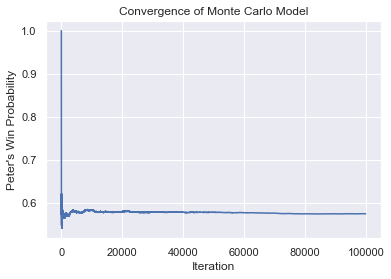

In [46]:
#Show convergence of algorithm. 
s = pd.Series(winners)
convergence = s.cumsum() / pd.Series(np.arange(1, len(s)+1), s.index)
sns.lineplot(data=convergence)
plt.title("Convergence of Monte Carlo Model")
plt.xlabel("Iteration")
plt.ylabel("Peter's Win Probability")
plt.savefig('MonteCarlo.png')

However, this solution does not actually work. The question requires 7 decimal places of accuracy which the brute-force simulation is unable to achieve. A more direct mathematical strategy is needed to get a precise answer. Here we use an equation that explicitly calculates the probability of rolling a given sum k given n dice of sides n.

In [47]:
#Calculate the probability of a sum k occurring given n dice with sides n.
def prob_outcome(k, s, n):
    prob = 0 
    possible_vals = math.pow(s,n)
    top_val = math.floor((k - n)/s)
    for i in range(0, top_val +1):
        prob += math.pow(-1, i) * special.comb(n,i) * special.comb(k-s*i-1,n-1)
    return prob/possible_vals

#Create a dictionary of sums k with their associated probabilities for n dice with s sides.
def find_probs(s, n): 
    prob_dict = {}
    for i in range(n, s * n + 1):
        prob_dict[i] = prob_outcome(i, s, n)
    return(prob_dict)

#Create a matrix of the product of the probabilities of seperate dice rolls. This will compute the probability of all combinations of their sums.
def create_matrix(prob1, prob2):
    prob_matrix = np.outer(prob1, prob2)
    return(prob_matrix)
        
#Create an array of outcomes and a list of their associated probabilities of occurance.
def label_creation(prob_dict):
    return np.array(list(prob_dict.keys())), np.array(list(prob_dict.values()))

#Compare the possible outcomes to produce a matrix that shows who wins. 
def win_matrix(outcomes1, outcomes2):
    d1 = outcomes1.shape[0]
    d2 = outcomes2.shape[0]
    win_matrix = np.zeros((d1,d2))
    for i in range(d1): #Rows
        for j in range(d2): #Columns
            if outcomes1[i] > outcomes2[j]: #Compare values
                win_matrix[i,j] = True
            else:
                win_matrix[i,j] = False
    return(win_matrix)
                
#Multiply the wins with the probability of the win occurring and sum them. This produces the overall win rate. 
def win_prob(win_matrix, prob_matrix):
    return (np.sum(win_matrix * prob_matrix))
    



In [48]:
#Save each outcome and its associated probability.
outcomes1, probs1 = label_creation(find_probs(4,9))
outcomes2, probs2 = label_creation(find_probs(6,6))

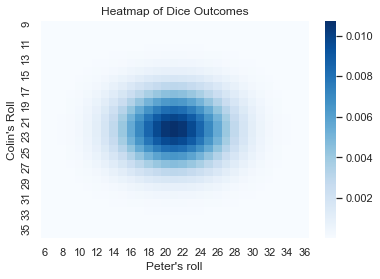

In [53]:
#Create a matrix of the product of the probabilities to find the chance of them occurring jointly.
prob_matrix = np.outer(probs1, probs2)

#Plot a heatmap of the outcomes.
df = pd.DataFrame(prob_matrix, index = outcomes1, columns = outcomes2)
sns.heatmap(df, cmap = 'Blues', linewidths=.00001).set_title('Heatmap of Dice Outcomes')
plt.xlabel("Peter's roll")
plt.ylabel("Colin's Roll")
plt.savefig("heatmap.png")
pass

In [50]:
#Calculate a matrix of Pete's wins.
wins = win_matrix(outcomes1, outcomes2)

Text(48.5, 0.5, "Colin's Roll")

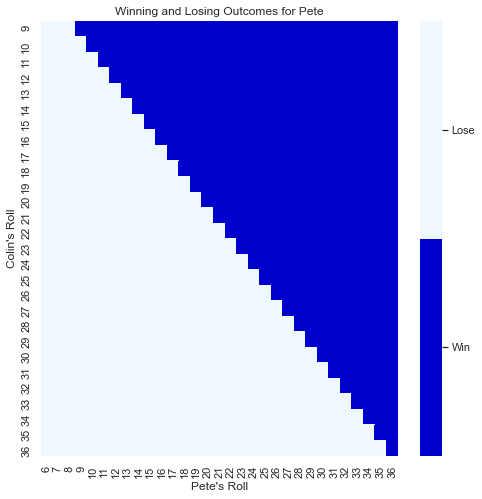

In [51]:
#Create pretty binary colormap to display the data.
colors = ["mediumblue", "aliceblue"] 
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

#Heatmap of winning values.
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(wins, cmap = cmap, yticklabels = outcomes1 , xticklabels = outcomes2, linewidths=.00001).set_title('Winning and Losing Outcomes for Pete')
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25,0.75])
colorbar.set_ticklabels(['Win', 'Lose'])
plt.xlabel("Pete's Roll")
plt.ylabel("Colin's Roll")

In [52]:
#Calculate the mean of the product of the two matrices to get the average win probability.
print("The probability Pete will win is {}.".format(win_prob(wins, prob_matrix)))

The probability Pete will win is 0.5731440767829801.


Dice Mathematics: https://mathworld.wolfram.com/Dice.html

Coloring Binary Heatmap: https://stackoverflow.com/questions/52364815/any-way-to-change-color-bar-cbar-in-seaborn-to-a-legend-for-a-binary-heatmap